In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/performance.csv')
data['time_taken_seconds'] = pd.to_numeric(data['time_taken_seconds'])

unique_sizes = data[['width', 'height']].drop_duplicates()
size_categories = {f"{row['width']}x{row['height']}": f"{row['width']}x{row['height']}" for _, row in unique_sizes.iterrows()}

def categorize_size(width, height):
    return size_categories.get(f"{width}x{height}", 'Other')

data['size_category'] = data.apply(lambda row: categorize_size(row['width'], row['height']), axis=1)
sns.set(style="whitegrid")

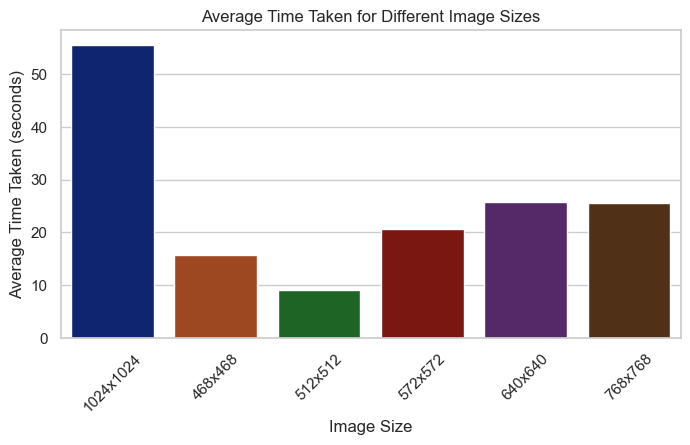

In [14]:
avg_time = data.groupby('size_category')['time_taken_seconds'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='size_category', y='time_taken_seconds', hue='size_category', data=avg_time, palette="dark", legend=False)
plt.title('Average Time Taken for Different Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Average Time Taken (seconds)')
plt.xticks(rotation=45)
plt.show()

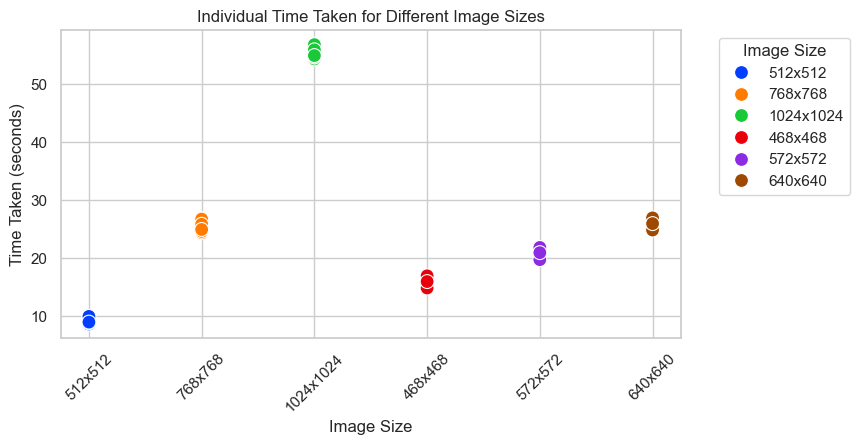

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='size_category', y='time_taken_seconds', data=data, hue='size_category', palette="bright", s=100)
plt.title('Individual Time Taken for Different Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Image Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()